In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sms
import sklearn.linear_model as slm
import matplotlib.lines as lines
import sklearn.preprocessing as spp
import matplotlib.cm as cm

## Test et train pour le rendu

In [2]:
train=pd.read_csv("trainData.csv")
test=pd.read_csv("testData.csv")

In [3]:
trainY=train[['callPrice']]
testY=test[['callPrice']]
trainX=train[train.columns.difference(['callPrice'])]
testX=test[test.columns.difference(['callPrice'])]

## Knn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from scipy.stats import pearsonr

score : 0.982821


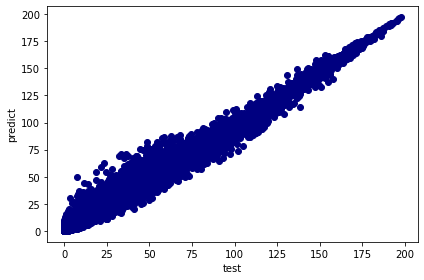

In [21]:
n_neighbors=6

for i, weights in enumerate(['distance']): #'uniform'
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(trainX, trainY).predict(testX)

    #plt.subplot(2, 1, i + 1)
    #plt.scatter(trainBetaX, trainBetaY, color='darkorange', label='data')
    plt.scatter(testY, y_, color='navy', label='prediction',)
    plt.axis('tight')
    #plt.legend()
    #plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    print("score : %f"%(knn.score(testX,testY))) #'%s'
    plt.xlabel("test")
    plt.ylabel("predict")

plt.tight_layout()
plt.show()

## Affichage score

In [14]:
knn.score(testX,testY)

0.9828210024054901

## Choix du k

### Première méthode par évolution du score

Text(0, 0.5, 'Score')

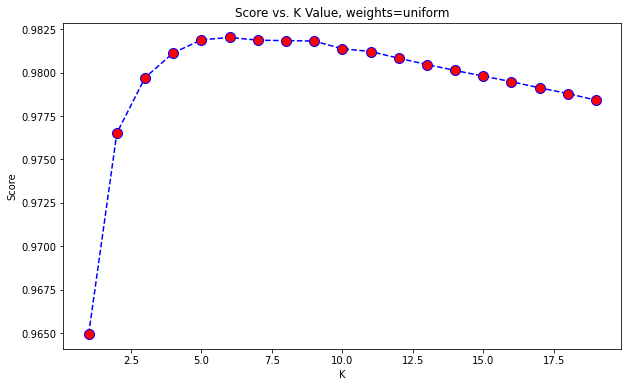

In [8]:
error_rate_u = []

for i in range(1,20):
 
 knn = neighbors.KNeighborsRegressor(n_neighbors=i,weights='uniform')
 knn.fit(trainX,trainY)
 pred_i = knn.predict(testX)
 error_rate_u.append(knn.score(testX,testY))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate_u,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Score vs. K Value, weights=uniform")
plt.xlabel("K")
plt.ylabel("Score")

###

In [9]:
print(np.argmax(error_rate_u)+1)
print(max(error_rate_u))

6
0.9820194644739383


Text(0, 0.5, 'Score')

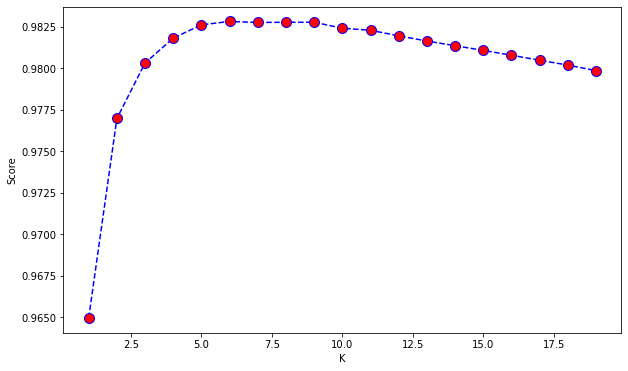

In [15]:
error_rate_d = []

for i in range(1,20):
 
 knn = neighbors.KNeighborsRegressor(n_neighbors=i,weights='distance')
 knn.fit(trainX,trainY)
 pred_i = knn.predict(testX)
 error_rate_d.append(knn.score(testX,testY))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate_d,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("")
plt.xlabel("K")
plt.ylabel("Score")

In [11]:
print(np.argmax(error_rate_d)+1)
print(max(error_rate_d))

6
0.9828210024054901
